# Dynamic damages

In [1]:
import numpy as np
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')
import pickle
from utilities import dLambda
from supportfunctions import finiteDiff
import matplotlib.pyplot as plt
from numba import njit

In [2]:
solu = pickle.load(open('../data/solution/solu_dynamicdmg_51*101_0303_13:35', 'rb'))

In [12]:
solu['solu_dynamicdmg'][0]['phi'][25]

array([0.0611684 , 0.06024663, 0.05934004, 0.05844827, 0.057571  ,
       0.05670791, 0.05585869, 0.05502303, 0.05420064, 0.05339122,
       0.05259448, 0.05181016, 0.05103797, 0.05027765, 0.04952893,
       0.04879157, 0.04806532, 0.04734992, 0.04664515, 0.04595076,
       0.04526654, 0.04459227, 0.04392772, 0.04327269, 0.04262697,
       0.04199036, 0.04136267, 0.0407437 , 0.04013327, 0.03953119,
       0.0389373 , 0.03835141, 0.03777336, 0.03720298, 0.03664012,
       0.03608461, 0.0355363 , 0.03499505, 0.03446071, 0.03393314,
       0.0334122 , 0.03289776, 0.03238968, 0.03188783, 0.0313921 ,
       0.03090235, 0.03041848, 0.02994036, 0.02946788, 0.02900093,
       0.02853941, 0.0280832 , 0.0276322 , 0.02718632, 0.02674546,
       0.02630951, 0.02587839, 0.02545201, 0.02503027, 0.02461309,
       0.02420038, 0.02379206, 0.02338805, 0.02298827, 0.02259264,
       0.02220107, 0.02181351, 0.02142987, 0.02105007, 0.02067406,
       0.02030175, 0.01993308, 0.01956798, 0.01920638, 0.01884

In [13]:
solu['y_grid'][20]
numy_bar = solu['numy_bar']

In [14]:
solu['y_grid'][numy_bar-1]

2.0

In [15]:
# backward induction
rho = .9
mu2 = 1.86/1000
sigma2 = solu['sigma2']

In [16]:
solu_dict = solu['solu_dynamicdmg']
z_grid = solu['z_grid']
y_grid = solu['y_grid']
hz = solu['hz']
hy = solu['hy']
delta = .01
eta = .032
v_n = solu['v_n']

In [17]:
gamma2pList = np.array([0, 2*0.0197])
v0 = solu_dict[0]['phi'][:, :numy_bar]
v1 = solu_dict[gamma2pList[0]]['phi'][:, numy_bar-1]
v2 = solu_dict[gamma2pList[1]]['phi'][:, numy_bar-1]

In [18]:
v1, v2

(array([0.04573787, 0.04570486, 0.04567514, 0.04564783, 0.0456224 ,
        0.0455985 , 0.04557587, 0.04555433, 0.04553374, 0.04551399,
        0.04549497, 0.04547663, 0.04545889, 0.0454417 , 0.04542502,
        0.0454088 , 0.04539302, 0.04537764, 0.04536264, 0.04534799,
        0.04533368, 0.04531968, 0.04530597, 0.04529256, 0.04527941,
        0.04526654, 0.04525395, 0.0452416 , 0.04522947, 0.04521755,
        0.04520583, 0.04519429, 0.04518293, 0.04517175, 0.04516072,
        0.04514985, 0.04513914, 0.04512856, 0.04511813, 0.04510784,
        0.04509768, 0.04508764, 0.04507773, 0.04506793, 0.04505825,
        0.04504869, 0.04503923, 0.04502988, 0.04502063, 0.04501148,
        0.04500243]),
 array([0.01971895, 0.01968594, 0.01965622, 0.01962891, 0.01960348,
        0.01957958, 0.01955695, 0.01953542, 0.01951482, 0.01949507,
        0.01947605, 0.01945771, 0.01943997, 0.01942278, 0.0194061 ,
        0.01938988, 0.0193741 , 0.01935873, 0.01934372, 0.01932908,
        0.01931476, 0.0193

In [625]:
numdmg = 3
dmg_weights = [.5, .5]
terminal_condition = np.average([v1, v2], axis=0, weights=dmg_weights)

In [635]:
terminal_condition

array([0.03272841, 0.0326954 , 0.03266568, 0.03263837, 0.03261294,
       0.03258904, 0.03256641, 0.03254487, 0.03252428, 0.03250453,
       0.03248551, 0.03246717, 0.03244943, 0.03243224, 0.03241556,
       0.03239934, 0.03238356, 0.03236818, 0.03235318, 0.03233853,
       0.03232422, 0.03231022, 0.03229651, 0.0322831 , 0.03226996,
       0.03225709, 0.03224449, 0.03223214, 0.03222002, 0.0322081 ,
       0.03219637, 0.03218483, 0.03217347, 0.03216229, 0.03215126,
       0.03214039, 0.03212968, 0.03211911, 0.03210868, 0.03209838,
       0.03208822, 0.03207818, 0.03206827, 0.03205847, 0.0320488 ,
       0.03203923, 0.03202977, 0.03202042, 0.03201117, 0.03200202,
       0.03199297])

In [542]:
numz = solu["numz"]
numy = 50
y_min = 0
y_max = 2
y_grid_new = np.linspace(y_min, y_max, numy)

(z_mat, y_mat) = np.meshgrid(z_grid, y_grid_new, indexing='ij')

In [543]:
gamma2pMat = np.zeros((numdmg-1, numz, numy))
gamma2pMat[0] = gamma2pList[0]
gamma2pMat[1] = gamma2pList[1]
dlambdaMat = dLambda(y_mat, 1, 0.00017675, 2*0.0022, np.sum(gamma2pList*dmg_weights, axis=0), 2)

In [544]:
np.sum(gamma2pList*dmg_weights, axis=0)

0.0197

In [545]:
hz = z_mat[1,0] - z_mat[0,0]
hy = y_mat[0,1] - y_mat[0,0]
hz, hy

(6.720000000000001e-05, 0.04081632653061224)

In [564]:
@njit
def get_coeff(v0, z_mat, y_mat, A, Bz, By, Czz, Cyy, D, terminal_condition, epsilon=.3,):
    numz, numy = z_mat.shape
    hz = z_mat[1,0] - z_mat[0,0]
    hy = y_mat[0,1] - y_mat[0,0]
    # coefficient matrix
    LHS = np.zeros((numy*numz, numy*numz))
    RHS = np.zeros(numy*numz)
    RHS += -D -1/epsilon*v0
    for i in range(numz):
        for j in range(numy):
            idx = i*numy + j
            idx_yp1 = idx + 1
            idx_yp2 = idx + 2
            idx_ym1 = idx - 1
            idx_ym2 = idx - 2
            idx_zp1 = (i+1)*numy + j
            idx_zp2 = (i+2)*numy + j
            idx_zm1 = (i-1)*numy + j
            idx_zm2 = (i-2)*numy + j
            LHS[idx, idx] += A[i,j] - 1/epsilon
            # assign coefficient
            # z grid relevant
            if i == 0:
                LHS[idx, idx] += -Bz[i,j]/hz + Czz[i,j]/(hz**2)  
                LHS[idx, idx_zp1] += Bz[i,j]/hz - Czz[i,j]*2/(hz**2)
                LHS[idx, idx_zp2] += Czz[i,j]/(hz**2)
            elif i == numz-1:
                LHS[idx, idx] += Bz[i,j]/hz + Czz[i,j]/(hz**2)
                LHS[idx, idx_zm1] += -Bz[i,j]/hz - 2*Czz[i,j]/(hz**2)
                LHS[idx, idx_zm2] += Czz[i,j]/(hz**2)            
            else:
                LHS[idx, idx_zp1] += Bz[i,j]*(1/hz)*(Bz[i,j] > 0) + Czz[i,j]/(hz**2)
                LHS[idx, idx] += Bz[i,j]*((-1/hz)*(Bz[i,j] > 0) + (1/hz)*(Bz[i,j] <= 0))- 2*Czz[i,j]/(hz**2) 
                LHS[idx, idx_zm1] +=  Bz[i,j]*(-1/hz)*(Bz[i,j] <= 0)+ Czz[i,j]/(hz**2)
            # y grid relevant
            if j == 0:
                LHS[idx, idx_yp2] += Cyy[i,j]/(hy**2)
                LHS[idx, idx_yp1] += By[i,j]/hy - 2*Cyy[i,j]/(hy**2)
                LHS[idx, idx] +=  - By[i,j]/hy + Cyy[i,j]/(hy**2)
            elif j == numy-1:
                LHS[idx, idx] += By[i,j]/hy + Cyy[i,j]/(hy**2)
                LHS[idx, idx_ym1] += -By[i,j]/hy - 2*Cyy[i,j]/(hy**2)
                LHS[idx, idx_ym2] += Cyy[i,j]/(hy**2)
                if boundedL:
                    LHS[idx] = 0
                    LHS[idx, idx] =   1
                    RHS[idx] = terminal_condition[i]
            else:
                LHS[idx, idx_yp1] += By[i,j]*(1/hy)*(By[i,j] > 0) + Cyy[i,j]/(hy**2)
                LHS[idx, idx] += By[i,j]*((-1/hy)*(By[i,j] > 0) + (1/hy)*(By[i,j] <= 0)) - 2*Cyy[i,j]/(hy**2)
                LHS[idx, idx_ym1] += By[i,j]*(-1/hy)*(By[i,j] <= 0) + Cyy[i,j]/(hy**2)  
#    phi_grid = np.linalg.solve(LHS, RHS) 
    return LHS, RHS # phi_grid

In [565]:
def pde_solve(v0, z_mat, y_mat, A, Bz, By, Czz, Cyy, D, terminal_condition, epsilon=.3,):
    v0long = v0.reshape(-1)
    D_long = D.reshape(-1)
    LHS, RHS = get_coeff(v0long, z_mat, y_mat, A, Bz, By, Czz, Cyy, D_long, terminal_condition, epsilon=.3,)
    phi_grid, exit_code = bicg(csc_matrix(LHS), RHS)
    phi_mat = phi_grid.reshape(v0.shape)
    return phi_mat

In [636]:
def false_transient(v0, z_mat, y_mat, terminal_condition,
                    dmg_params, model_params,
                    epsilon=.5, max_iter=10_000, tol=1e-8):
    gamma_1, gamma_2, gamma2pList, gamma_bar, dmg_weights = dmg_params
    delta, eta, mu2, sigma2, rho, v_n = model_params
    numz, numy = z_mat.shape
    hz = z_mat[1,0] - z_mat[0,0]
    hy = y_mat[0,1] - y_mat[0,0]
    dlambda = gamma_1 + gamma_2*y_mat\
    + np.sum(gamma2pList*dmg_weights,axis=0)*(y_mat-gamma_bar)*(y_mat>gamma_bar)
    # initiate v and control
    ems = delta*eta
    error = 1
    episode = 0
    while error > tol and episode < max_iter:
        v0_old = v0.copy()
        v0_dz = finiteDiff(v0, 0, 1, hz)
        v0_dzz = finiteDiff(v0, 0, 2, hz)
        v0_dy = finiteDiff(v0, 1, 1, hy)
        # control
        ems = (-delta*eta/(v0_dy*z_mat + v_n*dlambda*z_mat))*.5 + ems*.5
        ems[ems<=0] = 1e-16
        A = -delta*np.ones(z_mat.shape)
        Bz = -rho*(z_mat - mu2)
        By = z_mat*ems
        Czz = z_mat*sigma2**2/2
        Cyy = np.zeros(z_mat.shape)
        D = delta*eta*np.log(ems) + v_n*dlambda*z_mat*ems
        phi_mat = pde_solve(v0_old, z_mat, y_mat, A, Bz, By, Czz, Cyy, D, terminal_condition, epsilon)
        rhs = A*phi_mat + Bz*v0_dz + By*v0_dy + Czz*v0_dzz + D
        rhs_error = np.max(np.abs(rhs))
        error = np.max(np.abs((phi_mat-v0_old)/epsilon))
        v0 = phi_mat
        episode += 1
        print('Episode: {:d}\t lhs error: {:.12f}\t rhs error: {:.12f}'.format(episode,error,rhs_error))
    return v0, ems

In [637]:
gamma_1 = solu['gamma_1']
gamma_2 = solu['gamma_2']
gamma_bar = solu['gamma_bar']

dmgParams = (gamma_1, gamma_2, gamma2pList, gamma_bar, dmg_weights)
modelParams = (delta, eta, mu2, sigma2, rho, v_n)

In [638]:
modelParams, dmgParams

((0.01, 0.032, 0.00186, 0.013065591353603356, 0.9, -0.968),
 (0.00017675, 0.0044, array([0.    , 0.0394]), 2, [0.5, 0.5]))

## low damage

In [639]:
y_mat

array([[0.        , 0.04081633, 0.08163265, ..., 1.91836735, 1.95918367,
        2.        ],
       [0.        , 0.04081633, 0.08163265, ..., 1.91836735, 1.95918367,
        2.        ],
       [0.        , 0.04081633, 0.08163265, ..., 1.91836735, 1.95918367,
        2.        ],
       ...,
       [0.        , 0.04081633, 0.08163265, ..., 1.91836735, 1.95918367,
        2.        ],
       [0.        , 0.04081633, 0.08163265, ..., 1.91836735, 1.95918367,
        2.        ],
       [0.        , 0.04081633, 0.08163265, ..., 1.91836735, 1.95918367,
        2.        ]])

In [640]:
dmgParams = (gamma_1, gamma_2, gamma2pList, gamma_bar, np.array([1,0]))
modelParams = (delta, eta, mu2, sigma2, rho, v_n)
phi,ems = false_transient(np.zeros(z_mat.shape), z_mat, y_mat, terminal_condition, dmgParams, modelParams)

Episode: 1	 lhs error: 0.001150333259	 rhs error: 0.002572012950
Episode: 2	 lhs error: 0.000982421490	 rhs error: 0.001945461689
Episode: 3	 lhs error: 0.000890010701	 rhs error: 0.001681764665
Episode: 4	 lhs error: 0.000829261687	 rhs error: 0.001521894892
Episode: 5	 lhs error: 0.000784953560	 rhs error: 0.001410490072
Episode: 6	 lhs error: 0.000750429427	 rhs error: 0.001327279012
Episode: 7	 lhs error: 0.000722381961	 rhs error: 0.001262532719
Episode: 8	 lhs error: 0.000699021923	 rhs error: 0.001210741502
Episode: 9	 lhs error: 0.000679146421	 rhs error: 0.001168452631
Episode: 10	 lhs error: 0.000662067404	 rhs error: 0.001133217561
Episode: 11	 lhs error: 0.000647175193	 rhs error: 0.001103414130
Episode: 12	 lhs error: 0.000634058187	 rhs error: 0.001077769268
Episode: 13	 lhs error: 0.000622350300	 rhs error: 0.001055372697
Episode: 14	 lhs error: 0.000611768284	 rhs error: 0.001035524999
Episode: 15	 lhs error: 0.000602117485	 rhs error: 0.001017582253
Episode: 16	 lhs er

Episode: 125	 lhs error: 0.000287097303	 rhs error: 0.000479741045
Episode: 126	 lhs error: 0.000285679592	 rhs error: 0.000477528162
Episode: 127	 lhs error: 0.000284755810	 rhs error: 0.000475132688
Episode: 128	 lhs error: 0.000283274417	 rhs error: 0.000472464908
Episode: 129	 lhs error: 0.000281509749	 rhs error: 0.000470043468
Episode: 130	 lhs error: 0.000280106385	 rhs error: 0.000468398559
Episode: 131	 lhs error: 0.000278722723	 rhs error: 0.000466021639
Episode: 132	 lhs error: 0.000277795656	 rhs error: 0.000463696126
Episode: 133	 lhs error: 0.000276092890	 rhs error: 0.000461081255
Episode: 134	 lhs error: 0.000274724213	 rhs error: 0.000459096007
Episode: 135	 lhs error: 0.000273593612	 rhs error: 0.000456856936
Episode: 136	 lhs error: 0.000272038525	 rhs error: 0.000454490962
Episode: 137	 lhs error: 0.000270869454	 rhs error: 0.000452683938
Episode: 138	 lhs error: 0.000269432605	 rhs error: 0.000450221720
Episode: 139	 lhs error: 0.000268127919	 rhs error: 0.00044814

Episode: 249	 lhs error: 0.000164077525	 rhs error: 0.000271625944
Episode: 250	 lhs error: 0.000163274712	 rhs error: 0.000269627624
Episode: 251	 lhs error: 0.000162409983	 rhs error: 0.000268585090
Episode: 252	 lhs error: 0.000161157601	 rhs error: 0.000268159621
Episode: 253	 lhs error: 0.000161017241	 rhs error: 0.000266469878
Episode: 254	 lhs error: 0.000160219300	 rhs error: 0.000266138232
Episode: 255	 lhs error: 0.000159453145	 rhs error: 0.000264726542
Episode: 256	 lhs error: 0.000158699612	 rhs error: 0.000263286082
Episode: 257	 lhs error: 0.000158198246	 rhs error: 0.000262109129
Episode: 258	 lhs error: 0.000157451517	 rhs error: 0.000261193333
Episode: 259	 lhs error: 0.000156263193	 rhs error: 0.000260312960
Episode: 260	 lhs error: 0.000155508120	 rhs error: 0.000259106261
Episode: 261	 lhs error: 0.000154928948	 rhs error: 0.000257671599
Episode: 262	 lhs error: 0.000154199667	 rhs error: 0.000256106411
Episode: 263	 lhs error: 0.000153540407	 rhs error: 0.00025570

Episode: 373	 lhs error: 0.000096299833	 rhs error: 0.000160226551
Episode: 374	 lhs error: 0.000096106726	 rhs error: 0.000159669679
Episode: 375	 lhs error: 0.000095549361	 rhs error: 0.000158304365
Episode: 376	 lhs error: 0.000095425672	 rhs error: 0.000158298495
Episode: 377	 lhs error: 0.000095252749	 rhs error: 0.000157495286
Episode: 378	 lhs error: 0.000094429198	 rhs error: 0.000156450460
Episode: 379	 lhs error: 0.000094413246	 rhs error: 0.000155869364
Episode: 380	 lhs error: 0.000093914233	 rhs error: 0.000155398482
Episode: 381	 lhs error: 0.000093381176	 rhs error: 0.000154853139
Episode: 382	 lhs error: 0.000093233940	 rhs error: 0.000154318848
Episode: 383	 lhs error: 0.000092852000	 rhs error: 0.000153189468
Episode: 384	 lhs error: 0.000092081562	 rhs error: 0.000152726898
Episode: 385	 lhs error: 0.000091504004	 rhs error: 0.000152209271
Episode: 386	 lhs error: 0.000091230299	 rhs error: 0.000151160763
Episode: 387	 lhs error: 0.000090754648	 rhs error: 0.00015099

Episode: 497	 lhs error: 0.000058073924	 rhs error: 0.000094973291
Episode: 498	 lhs error: 0.000058296507	 rhs error: 0.000095895462
Episode: 499	 lhs error: 0.000058071402	 rhs error: 0.000094990830
Episode: 500	 lhs error: 0.000057275497	 rhs error: 0.000095362823
Episode: 501	 lhs error: 0.000057507962	 rhs error: 0.000093841829
Episode: 502	 lhs error: 0.000056852302	 rhs error: 0.000095299760
Episode: 503	 lhs error: 0.000057000050	 rhs error: 0.000099194368
Episode: 504	 lhs error: 0.000057247405	 rhs error: 0.000098372572
Episode: 505	 lhs error: 0.000056589723	 rhs error: 0.000093396651
Episode: 506	 lhs error: 0.000056101486	 rhs error: 0.000092434120
Episode: 507	 lhs error: 0.000055570417	 rhs error: 0.000092317072
Episode: 508	 lhs error: 0.000055956865	 rhs error: 0.000091800816
Episode: 509	 lhs error: 0.000055457238	 rhs error: 0.000091985086
Episode: 510	 lhs error: 0.000055751323	 rhs error: 0.000090328074
Episode: 511	 lhs error: 0.000055347575	 rhs error: 0.00009049

Episode: 621	 lhs error: 0.000035234334	 rhs error: 0.000058922343
Episode: 622	 lhs error: 0.000035093940	 rhs error: 0.000058688810
Episode: 623	 lhs error: 0.000034954142	 rhs error: 0.000058456268
Episode: 624	 lhs error: 0.000034814937	 rhs error: 0.000058224713
Episode: 625	 lhs error: 0.000034676322	 rhs error: 0.000057994140
Episode: 626	 lhs error: 0.000034538295	 rhs error: 0.000057764545
Episode: 627	 lhs error: 0.000034400853	 rhs error: 0.000057535922
Episode: 628	 lhs error: 0.000034263992	 rhs error: 0.000057308268
Episode: 629	 lhs error: 0.000034127711	 rhs error: 0.000057081577
Episode: 630	 lhs error: 0.000033992007	 rhs error: 0.000056855845
Episode: 631	 lhs error: 0.000033856876	 rhs error: 0.000056631067
Episode: 632	 lhs error: 0.000033722317	 rhs error: 0.000056407240
Episode: 633	 lhs error: 0.000033588325	 rhs error: 0.000056184358
Episode: 634	 lhs error: 0.000033454900	 rhs error: 0.000055962417
Episode: 635	 lhs error: 0.000033322038	 rhs error: 0.00005574

Episode: 745	 lhs error: 0.000021626926	 rhs error: 0.000036286118
Episode: 746	 lhs error: 0.000021543075	 rhs error: 0.000036146610
Episode: 747	 lhs error: 0.000021459566	 rhs error: 0.000036007670
Episode: 748	 lhs error: 0.000021376396	 rhs error: 0.000035869295
Episode: 749	 lhs error: 0.000021293564	 rhs error: 0.000035731482
Episode: 750	 lhs error: 0.000021211070	 rhs error: 0.000035594230
Episode: 751	 lhs error: 0.000021128911	 rhs error: 0.000035457535
Episode: 752	 lhs error: 0.000021047086	 rhs error: 0.000035321396
Episode: 753	 lhs error: 0.000020965593	 rhs error: 0.000035185810
Episode: 754	 lhs error: 0.000020884431	 rhs error: 0.000035050774
Episode: 755	 lhs error: 0.000020803599	 rhs error: 0.000034916287
Episode: 756	 lhs error: 0.000020723095	 rhs error: 0.000034782346
Episode: 757	 lhs error: 0.000020642918	 rhs error: 0.000034648948
Episode: 758	 lhs error: 0.000020563066	 rhs error: 0.000034516091
Episode: 759	 lhs error: 0.000020483538	 rhs error: 0.00003438

Episode: 869	 lhs error: 0.000013429805	 rhs error: 0.000022646477
Episode: 870	 lhs error: 0.000013378826	 rhs error: 0.000022561642
Episode: 871	 lhs error: 0.000013328048	 rhs error: 0.000022477140
Episode: 872	 lhs error: 0.000013277470	 rhs error: 0.000022392972
Episode: 873	 lhs error: 0.000013227092	 rhs error: 0.000022309136
Episode: 874	 lhs error: 0.000013176912	 rhs error: 0.000022225630
Episode: 875	 lhs error: 0.000013126930	 rhs error: 0.000022142453
Episode: 876	 lhs error: 0.000013077145	 rhs error: 0.000022059603
Episode: 877	 lhs error: 0.000013027557	 rhs error: 0.000021977080
Episode: 878	 lhs error: 0.000012978163	 rhs error: 0.000021894882
Episode: 879	 lhs error: 0.000012928965	 rhs error: 0.000021813007
Episode: 880	 lhs error: 0.000012879961	 rhs error: 0.000021731454
Episode: 881	 lhs error: 0.000012831149	 rhs error: 0.000021650222
Episode: 882	 lhs error: 0.000012782530	 rhs error: 0.000021569310
Episode: 883	 lhs error: 0.000012734102	 rhs error: 0.00002148

Episode: 993	 lhs error: 0.000008416331	 rhs error: 0.000024100864
Episode: 994	 lhs error: 0.000008384964	 rhs error: 0.000024153033
Episode: 995	 lhs error: 0.000008353719	 rhs error: 0.000024205000
Episode: 996	 lhs error: 0.000008322594	 rhs error: 0.000024256766
Episode: 997	 lhs error: 0.000008291590	 rhs error: 0.000024308332
Episode: 998	 lhs error: 0.000008260706	 rhs error: 0.000024359699
Episode: 999	 lhs error: 0.000008229941	 rhs error: 0.000024410868
Episode: 1000	 lhs error: 0.000008199296	 rhs error: 0.000024461839
Episode: 1001	 lhs error: 0.000008168768	 rhs error: 0.000024512612
Episode: 1002	 lhs error: 0.000008138359	 rhs error: 0.000024563190
Episode: 1003	 lhs error: 0.000008108068	 rhs error: 0.000024613571
Episode: 1004	 lhs error: 0.000008077893	 rhs error: 0.000024663758
Episode: 1005	 lhs error: 0.000008047835	 rhs error: 0.000024713751
Episode: 1006	 lhs error: 0.000008017893	 rhs error: 0.000024763551
Episode: 1007	 lhs error: 0.000007988067	 rhs error: 0.

Episode: 1117	 lhs error: 0.000005318903	 rhs error: 0.000029252389
Episode: 1118	 lhs error: 0.000005299430	 rhs error: 0.000029284767
Episode: 1119	 lhs error: 0.000005280031	 rhs error: 0.000029317020
Episode: 1120	 lhs error: 0.000005260706	 rhs error: 0.000029349151
Episode: 1121	 lhs error: 0.000005241454	 rhs error: 0.000029381159
Episode: 1122	 lhs error: 0.000005222275	 rhs error: 0.000029413045
Episode: 1123	 lhs error: 0.000005203169	 rhs error: 0.000029444810
Episode: 1124	 lhs error: 0.000005184136	 rhs error: 0.000029476454
Episode: 1125	 lhs error: 0.000005165176	 rhs error: 0.000029507977
Episode: 1126	 lhs error: 0.000005146287	 rhs error: 0.000029539381
Episode: 1127	 lhs error: 0.000005127471	 rhs error: 0.000029570665
Episode: 1128	 lhs error: 0.000005108726	 rhs error: 0.000029601832
Episode: 1129	 lhs error: 0.000005090052	 rhs error: 0.000029632880
Episode: 1130	 lhs error: 0.000005071450	 rhs error: 0.000029663810
Episode: 1131	 lhs error: 0.000005052918	 rhs er

Episode: 1241	 lhs error: 0.000003388657	 rhs error: 0.000032462795
Episode: 1242	 lhs error: 0.000003376467	 rhs error: 0.000032483072
Episode: 1243	 lhs error: 0.000003364322	 rhs error: 0.000032503272
Episode: 1244	 lhs error: 0.000003352223	 rhs error: 0.000032523398
Episode: 1245	 lhs error: 0.000003340169	 rhs error: 0.000032543448
Episode: 1246	 lhs error: 0.000003328160	 rhs error: 0.000032563424
Episode: 1247	 lhs error: 0.000003316196	 rhs error: 0.000032583326
Episode: 1248	 lhs error: 0.000003304277	 rhs error: 0.000032603153
Episode: 1249	 lhs error: 0.000003292402	 rhs error: 0.000032622907
Episode: 1250	 lhs error: 0.000003280571	 rhs error: 0.000032642587
Episode: 1251	 lhs error: 0.000003268785	 rhs error: 0.000032662194
Episode: 1252	 lhs error: 0.000003257043	 rhs error: 0.000032681729
Episode: 1253	 lhs error: 0.000003245344	 rhs error: 0.000032701191
Episode: 1254	 lhs error: 0.000003233690	 rhs error: 0.000032720580
Episode: 1255	 lhs error: 0.000003222078	 rhs er

Episode: 1365	 lhs error: 0.000002175683	 rhs error: 0.000034481370
Episode: 1366	 lhs error: 0.000002167988	 rhs error: 0.000034494163
Episode: 1367	 lhs error: 0.000002160321	 rhs error: 0.000034506908
Episode: 1368	 lhs error: 0.000002152681	 rhs error: 0.000034519605
Episode: 1369	 lhs error: 0.000002145070	 rhs error: 0.000034532254
Episode: 1370	 lhs error: 0.000002137486	 rhs error: 0.000034544856
Episode: 1371	 lhs error: 0.000002129930	 rhs error: 0.000034557410
Episode: 1372	 lhs error: 0.000002122401	 rhs error: 0.000034569917
Episode: 1373	 lhs error: 0.000002114900	 rhs error: 0.000034582378
Episode: 1374	 lhs error: 0.000002107427	 rhs error: 0.000034594792
Episode: 1375	 lhs error: 0.000002099981	 rhs error: 0.000034607159
Episode: 1376	 lhs error: 0.000002092562	 rhs error: 0.000034619480
Episode: 1377	 lhs error: 0.000002085171	 rhs error: 0.000034631756
Episode: 1378	 lhs error: 0.000002077807	 rhs error: 0.000034643987
Episode: 1379	 lhs error: 0.000002070471	 rhs er

Episode: 1489	 lhs error: 0.000001407204	 rhs error: 0.000035759032
Episode: 1490	 lhs error: 0.000001402308	 rhs error: 0.000035767181
Episode: 1491	 lhs error: 0.000001397430	 rhs error: 0.000035775300
Episode: 1492	 lhs error: 0.000001392569	 rhs error: 0.000035783389
Episode: 1493	 lhs error: 0.000001387726	 rhs error: 0.000035791450
Episode: 1494	 lhs error: 0.000001382901	 rhs error: 0.000035799481
Episode: 1495	 lhs error: 0.000001378093	 rhs error: 0.000035807483
Episode: 1496	 lhs error: 0.000001373302	 rhs error: 0.000035815457
Episode: 1497	 lhs error: 0.000001368528	 rhs error: 0.000035823401
Episode: 1498	 lhs error: 0.000001363772	 rhs error: 0.000035831317
Episode: 1499	 lhs error: 0.000001359032	 rhs error: 0.000035839204
Episode: 1500	 lhs error: 0.000001354310	 rhs error: 0.000035847062
Episode: 1501	 lhs error: 0.000001349605	 rhs error: 0.000035854892
Episode: 1502	 lhs error: 0.000001344916	 rhs error: 0.000035862694
Episode: 1503	 lhs error: 0.000001340244	 rhs er

Episode: 1613	 lhs error: 0.000000916486	 rhs error: 0.000036575528
Episode: 1614	 lhs error: 0.000000913347	 rhs error: 0.000036580757
Episode: 1615	 lhs error: 0.000000910219	 rhs error: 0.000036585967
Episode: 1616	 lhs error: 0.000000907102	 rhs error: 0.000036591159
Episode: 1617	 lhs error: 0.000000903996	 rhs error: 0.000036596332
Episode: 1618	 lhs error: 0.000000900901	 rhs error: 0.000036601487
Episode: 1619	 lhs error: 0.000000897816	 rhs error: 0.000036606624
Episode: 1620	 lhs error: 0.000000894743	 rhs error: 0.000036611742
Episode: 1621	 lhs error: 0.000000891681	 rhs error: 0.000036616841
Episode: 1622	 lhs error: 0.000000888629	 rhs error: 0.000036621922
Episode: 1623	 lhs error: 0.000000885588	 rhs error: 0.000036626985
Episode: 1624	 lhs error: 0.000000882558	 rhs error: 0.000036632029
Episode: 1625	 lhs error: 0.000000879538	 rhs error: 0.000036637056
Episode: 1626	 lhs error: 0.000000876529	 rhs error: 0.000036642064
Episode: 1627	 lhs error: 0.000000873531	 rhs er

Episode: 1737	 lhs error: 0.000000600734	 rhs error: 0.000037101144
Episode: 1738	 lhs error: 0.000000598705	 rhs error: 0.000037104518
Episode: 1739	 lhs error: 0.000000596684	 rhs error: 0.000037107879
Episode: 1740	 lhs error: 0.000000594670	 rhs error: 0.000037111228
Episode: 1741	 lhs error: 0.000000592663	 rhs error: 0.000037114565
Episode: 1742	 lhs error: 0.000000590664	 rhs error: 0.000037117890
Episode: 1743	 lhs error: 0.000000588672	 rhs error: 0.000037121203
Episode: 1744	 lhs error: 0.000000586686	 rhs error: 0.000037124503
Episode: 1745	 lhs error: 0.000000584707	 rhs error: 0.000037127792
Episode: 1746	 lhs error: 0.000000582735	 rhs error: 0.000037131069
Episode: 1747	 lhs error: 0.000000580770	 rhs error: 0.000037134335
Episode: 1748	 lhs error: 0.000000578812	 rhs error: 0.000037137589
Episode: 1749	 lhs error: 0.000000576860	 rhs error: 0.000037140832
Episode: 1750	 lhs error: 0.000000574915	 rhs error: 0.000037144063
Episode: 1751	 lhs error: 0.000000572976	 rhs er

Episode: 1861	 lhs error: 0.000000396098	 rhs error: 0.000037441442
Episode: 1862	 lhs error: 0.000000394780	 rhs error: 0.000037443646
Episode: 1863	 lhs error: 0.000000393465	 rhs error: 0.000037445843
Episode: 1864	 lhs error: 0.000000392156	 rhs error: 0.000037448032
Episode: 1865	 lhs error: 0.000000390850	 rhs error: 0.000037450213
Episode: 1866	 lhs error: 0.000000389549	 rhs error: 0.000037452387
Episode: 1867	 lhs error: 0.000000388253	 rhs error: 0.000037454553
Episode: 1868	 lhs error: 0.000000386960	 rhs error: 0.000037456711
Episode: 1869	 lhs error: 0.000000385672	 rhs error: 0.000037458861
Episode: 1870	 lhs error: 0.000000384389	 rhs error: 0.000037461004
Episode: 1871	 lhs error: 0.000000383109	 rhs error: 0.000037463139
Episode: 1872	 lhs error: 0.000000381834	 rhs error: 0.000037465265
Episode: 1873	 lhs error: 0.000000380564	 rhs error: 0.000037467385
Episode: 1874	 lhs error: 0.000000379297	 rhs error: 0.000037469496
Episode: 1875	 lhs error: 0.000000378035	 rhs er

Episode: 1985	 lhs error: 0.000000262572	 rhs error: 0.000037663809
Episode: 1986	 lhs error: 0.000000261708	 rhs error: 0.000037665251
Episode: 1987	 lhs error: 0.000000260847	 rhs error: 0.000037666687
Episode: 1988	 lhs error: 0.000000259989	 rhs error: 0.000037668119
Episode: 1989	 lhs error: 0.000000259134	 rhs error: 0.000037669546
Episode: 1990	 lhs error: 0.000000258282	 rhs error: 0.000037670968
Episode: 1991	 lhs error: 0.000000257433	 rhs error: 0.000037672386
Episode: 1992	 lhs error: 0.000000256587	 rhs error: 0.000037673799
Episode: 1993	 lhs error: 0.000000255743	 rhs error: 0.000037675207
Episode: 1994	 lhs error: 0.000000254903	 rhs error: 0.000037676610
Episode: 1995	 lhs error: 0.000000254065	 rhs error: 0.000037678009
Episode: 1996	 lhs error: 0.000000253231	 rhs error: 0.000037679403
Episode: 1997	 lhs error: 0.000000252399	 rhs error: 0.000037680792
Episode: 1998	 lhs error: 0.000000251569	 rhs error: 0.000037682177
Episode: 1999	 lhs error: 0.000000250743	 rhs er

Episode: 2109	 lhs error: 0.000000174907	 rhs error: 0.000037809753
Episode: 2110	 lhs error: 0.000000174338	 rhs error: 0.000037810691
Episode: 2111	 lhs error: 0.000000173770	 rhs error: 0.000037811626
Episode: 2112	 lhs error: 0.000000173205	 rhs error: 0.000037812558
Episode: 2113	 lhs error: 0.000000172641	 rhs error: 0.000037813486
Episode: 2114	 lhs error: 0.000000172079	 rhs error: 0.000037814412
Episode: 2115	 lhs error: 0.000000171519	 rhs error: 0.000037815335
Episode: 2116	 lhs error: 0.000000170961	 rhs error: 0.000037816255
Episode: 2117	 lhs error: 0.000000170404	 rhs error: 0.000037817172
Episode: 2118	 lhs error: 0.000000169849	 rhs error: 0.000037818087
Episode: 2119	 lhs error: 0.000000169296	 rhs error: 0.000037818999
Episode: 2120	 lhs error: 0.000000168745	 rhs error: 0.000037819909
Episode: 2121	 lhs error: 0.000000168196	 rhs error: 0.000037820816
Episode: 2122	 lhs error: 0.000000167648	 rhs error: 0.000037821721
Episode: 2123	 lhs error: 0.000000167103	 rhs er

Episode: 2233	 lhs error: 0.000000116999	 rhs error: 0.000037906088
Episode: 2234	 lhs error: 0.000000116622	 rhs error: 0.000037906719
Episode: 2235	 lhs error: 0.000000116247	 rhs error: 0.000037907348
Episode: 2236	 lhs error: 0.000000115873	 rhs error: 0.000037907974
Episode: 2237	 lhs error: 0.000000115500	 rhs error: 0.000037908599
Episode: 2238	 lhs error: 0.000000115128	 rhs error: 0.000037909222
Episode: 2239	 lhs error: 0.000000114758	 rhs error: 0.000037909843
Episode: 2240	 lhs error: 0.000000114389	 rhs error: 0.000037910461
Episode: 2241	 lhs error: 0.000000114021	 rhs error: 0.000037911078
Episode: 2242	 lhs error: 0.000000113654	 rhs error: 0.000037911693
Episode: 2243	 lhs error: 0.000000113289	 rhs error: 0.000037912306
Episode: 2244	 lhs error: 0.000000112924	 rhs error: 0.000037912917
Episode: 2245	 lhs error: 0.000000112561	 rhs error: 0.000037913526
Episode: 2246	 lhs error: 0.000000112199	 rhs error: 0.000037914133
Episode: 2247	 lhs error: 0.000000111839	 rhs er

Episode: 2357	 lhs error: 0.000000078560	 rhs error: 0.000037969970
Episode: 2358	 lhs error: 0.000000078309	 rhs error: 0.000037970388
Episode: 2359	 lhs error: 0.000000078059	 rhs error: 0.000037970805
Episode: 2360	 lhs error: 0.000000077810	 rhs error: 0.000037971222
Episode: 2361	 lhs error: 0.000000077561	 rhs error: 0.000037971637
Episode: 2362	 lhs error: 0.000000077314	 rhs error: 0.000037972051
Episode: 2363	 lhs error: 0.000000077068	 rhs error: 0.000037972464
Episode: 2364	 lhs error: 0.000000076823	 rhs error: 0.000037972877
Episode: 2365	 lhs error: 0.000000076578	 rhs error: 0.000037973288
Episode: 2366	 lhs error: 0.000000076335	 rhs error: 0.000037973699
Episode: 2367	 lhs error: 0.000000076092	 rhs error: 0.000037974109
Episode: 2368	 lhs error: 0.000000075850	 rhs error: 0.000037974517
Episode: 2369	 lhs error: 0.000000075609	 rhs error: 0.000037974925
Episode: 2370	 lhs error: 0.000000075368	 rhs error: 0.000037975332
Episode: 2371	 lhs error: 0.000000075128	 rhs er

Episode: 2481	 lhs error: 0.000000052935	 rhs error: 0.000038012765
Episode: 2482	 lhs error: 0.000000052767	 rhs error: 0.000038013049
Episode: 2483	 lhs error: 0.000000052600	 rhs error: 0.000038013331
Episode: 2484	 lhs error: 0.000000052434	 rhs error: 0.000038013613
Episode: 2485	 lhs error: 0.000000052268	 rhs error: 0.000038013893
Episode: 2486	 lhs error: 0.000000052103	 rhs error: 0.000038014172
Episode: 2487	 lhs error: 0.000000051938	 rhs error: 0.000038014451
Episode: 2488	 lhs error: 0.000000051773	 rhs error: 0.000038014727
Episode: 2489	 lhs error: 0.000000051610	 rhs error: 0.000038015003
Episode: 2490	 lhs error: 0.000000051446	 rhs error: 0.000038015277
Episode: 2491	 lhs error: 0.000000051283	 rhs error: 0.000038015549
Episode: 2492	 lhs error: 0.000000051120	 rhs error: 0.000038015820
Episode: 2493	 lhs error: 0.000000050958	 rhs error: 0.000038016090
Episode: 2494	 lhs error: 0.000000050796	 rhs error: 0.000038016358
Episode: 2495	 lhs error: 0.000000050635	 rhs er

Episode: 2605	 lhs error: 0.000000035767	 rhs error: 0.000038041304
Episode: 2606	 lhs error: 0.000000035654	 rhs error: 0.000038041494
Episode: 2607	 lhs error: 0.000000035542	 rhs error: 0.000038041684
Episode: 2608	 lhs error: 0.000000035430	 rhs error: 0.000038041873
Episode: 2609	 lhs error: 0.000000035318	 rhs error: 0.000038042060
Episode: 2610	 lhs error: 0.000000035206	 rhs error: 0.000038042247
Episode: 2611	 lhs error: 0.000000035095	 rhs error: 0.000038042433
Episode: 2612	 lhs error: 0.000000034984	 rhs error: 0.000038042618
Episode: 2613	 lhs error: 0.000000034873	 rhs error: 0.000038042802
Episode: 2614	 lhs error: 0.000000034763	 rhs error: 0.000038042986
Episode: 2615	 lhs error: 0.000000034653	 rhs error: 0.000038043168
Episode: 2616	 lhs error: 0.000000034544	 rhs error: 0.000038043350
Episode: 2617	 lhs error: 0.000000034436	 rhs error: 0.000038043532
Episode: 2618	 lhs error: 0.000000034327	 rhs error: 0.000038043713
Episode: 2619	 lhs error: 0.000000034219	 rhs er

Episode: 2729	 lhs error: 0.000000024223	 rhs error: 0.000038060473
Episode: 2730	 lhs error: 0.000000024148	 rhs error: 0.000038060605
Episode: 2731	 lhs error: 0.000000024073	 rhs error: 0.000038060736
Episode: 2732	 lhs error: 0.000000023998	 rhs error: 0.000038060866
Episode: 2733	 lhs error: 0.000000023923	 rhs error: 0.000038060997
Episode: 2734	 lhs error: 0.000000023849	 rhs error: 0.000038061126
Episode: 2735	 lhs error: 0.000000023774	 rhs error: 0.000038061255
Episode: 2736	 lhs error: 0.000000023700	 rhs error: 0.000038061384
Episode: 2737	 lhs error: 0.000000023626	 rhs error: 0.000038061512
Episode: 2738	 lhs error: 0.000000023552	 rhs error: 0.000038061640
Episode: 2739	 lhs error: 0.000000023478	 rhs error: 0.000038061767
Episode: 2740	 lhs error: 0.000000023405	 rhs error: 0.000038061893
Episode: 2741	 lhs error: 0.000000023332	 rhs error: 0.000038062019
Episode: 2742	 lhs error: 0.000000023259	 rhs error: 0.000038062144
Episode: 2743	 lhs error: 0.000000023186	 rhs er

Episode: 2853	 lhs error: 0.000000016448	 rhs error: 0.000038073524
Episode: 2854	 lhs error: 0.000000016397	 rhs error: 0.000038073612
Episode: 2855	 lhs error: 0.000000016346	 rhs error: 0.000038073700
Episode: 2856	 lhs error: 0.000000016295	 rhs error: 0.000038073787
Episode: 2857	 lhs error: 0.000000016244	 rhs error: 0.000038073873
Episode: 2858	 lhs error: 0.000000016193	 rhs error: 0.000038073959
Episode: 2859	 lhs error: 0.000000016142	 rhs error: 0.000038074044
Episode: 2860	 lhs error: 0.000000016092	 rhs error: 0.000038074129
Episode: 2861	 lhs error: 0.000000016041	 rhs error: 0.000038074213
Episode: 2862	 lhs error: 0.000000015991	 rhs error: 0.000038074296
Episode: 2863	 lhs error: 0.000000015941	 rhs error: 0.000038074379
Episode: 2864	 lhs error: 0.000000015891	 rhs error: 0.000038074461
Episode: 2865	 lhs error: 0.000000015842	 rhs error: 0.000038074543
Episode: 2866	 lhs error: 0.000000015793	 rhs error: 0.000038074624
Episode: 2867	 lhs error: 0.000000015744	 rhs er

Episode: 2977	 lhs error: 0.000000011183	 rhs error: 0.000038082324
Episode: 2978	 lhs error: 0.000000011148	 rhs error: 0.000038082382
Episode: 2979	 lhs error: 0.000000011114	 rhs error: 0.000038082440
Episode: 2980	 lhs error: 0.000000011080	 rhs error: 0.000038082497
Episode: 2981	 lhs error: 0.000000011045	 rhs error: 0.000038082555
Episode: 2982	 lhs error: 0.000000011011	 rhs error: 0.000038082612
Episode: 2983	 lhs error: 0.000000010977	 rhs error: 0.000038082669
Episode: 2984	 lhs error: 0.000000010943	 rhs error: 0.000038082726
Episode: 2985	 lhs error: 0.000000010909	 rhs error: 0.000038082782
Episode: 2986	 lhs error: 0.000000010876	 rhs error: 0.000038082838
Episode: 2987	 lhs error: 0.000000010842	 rhs error: 0.000038082893
Episode: 2988	 lhs error: 0.000000010808	 rhs error: 0.000038082949
Episode: 2989	 lhs error: 0.000000010775	 rhs error: 0.000038083004
Episode: 2990	 lhs error: 0.000000010742	 rhs error: 0.000038083058
Episode: 2991	 lhs error: 0.000000010709	 rhs er

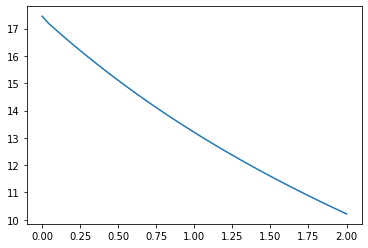

In [641]:
plt.plot(y_grid_new, ems[25])